<a href="https://colab.research.google.com/github/ksaverdekar3009/Crop_Recommandation/blob/main/Crop_Recommandation_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [3]:
df = pd.read_csv('/content/drive/MyDrive/SEM-II/Research Component/Crop Recommendation using Soil Properties and Weather Prediction.csv')
# Clean column names
df.columns = df.columns.str.strip()

In [4]:
df.sample(5)

,Soilcolor,Soil_pH,Potassium,Phosphorus,Nitrogen,Zinc,Sulphur,Humidity_Winter,Humidity_Spring,Humidity_Summer,...,Precipitation_Winter,Precipitation_Spring,Precipitation_Summer,Precipitation_Autumn,WindDirection_10m,Topsoil_Moisture,Cloud_Amount,WindSpeed_2m_Range,Pressure,label
68,red,5.8,319.0,7.0,0.18,2.1,7.0,7.18,7.65,10.48,...,2.07,2.61,4.84,3.63,75.69,0.65,0.46,46.10,74.17,Barley
1717,black,7.0,348.0,1.0,0.07,0.9,3.0,8.34,9.28,12.84,...,0.87,4.01,15.06,4.36,3.44,0.70,48.62,6.10,79.61,Pea
135,other,6.1,344.0,90.0,0.17,3.6,11.0,7.18,7.65,10.48,...,2.07,2.61,4.84,3.63,75.69,0.65,0.46,46.10,74.17,Barley
1911,other,6.1,169.0,9.0,0.06,3.1,6.0,8.02,8.50,12.59,...,0.75,2.37,8.35,2.16,67.12,0.62,57.49,5.56,81.40,Teff
2888,red,5.5,124.0,1.0,0.22,0.9,9.0,8.51,9.34,12.17,...,1.74,5.20,17.82,5.82,36.06,0.77,59.11,5.41,77.29,Teff


In [5]:
# Clean 'Soilcolor' values
soilcolor_mapping = {
    "redish brown": "reddish brown", "reddis brown": "reddish brown", "red brown": "reddish brown",
    "redishbrown": "reddish brown", "reddish broown": "reddish brown", "reddish": "red",
    "red;luvisols": "red", "replacement of inaccessible target red;luvisols": "red",
    "darkbrown": "dark brown", "dark greyish brown": "dark grayish brown",
    "dark grayish": "dark grayish brown", "grayish brown (gb)": "grayish brown",
    "lihgtish brown": "light brown", "perl brown": "light brown", "yellowish brown": "brown",
    "black;vertisol": "black"
}
df["Soilcolor"] = df["Soilcolor"].str.lower().str.strip().replace(soilcolor_mapping)

In [6]:
# Encode categorical variables
le_soil = LabelEncoder()
df["Soilcolor"] = le_soil.fit_transform(df["Soilcolor"])

<ipython-input-7-172b48634eaf>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["label"], y=df[col], palette="coolwarm")
<ipython-input-7-172b48634eaf>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["label"], y=df[col], palette="coolwarm")
<ipython-input-7-172b48634eaf>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["label"], y=df[col], palette="coolwarm")
<ipython-input-7-172b48634eaf>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hu

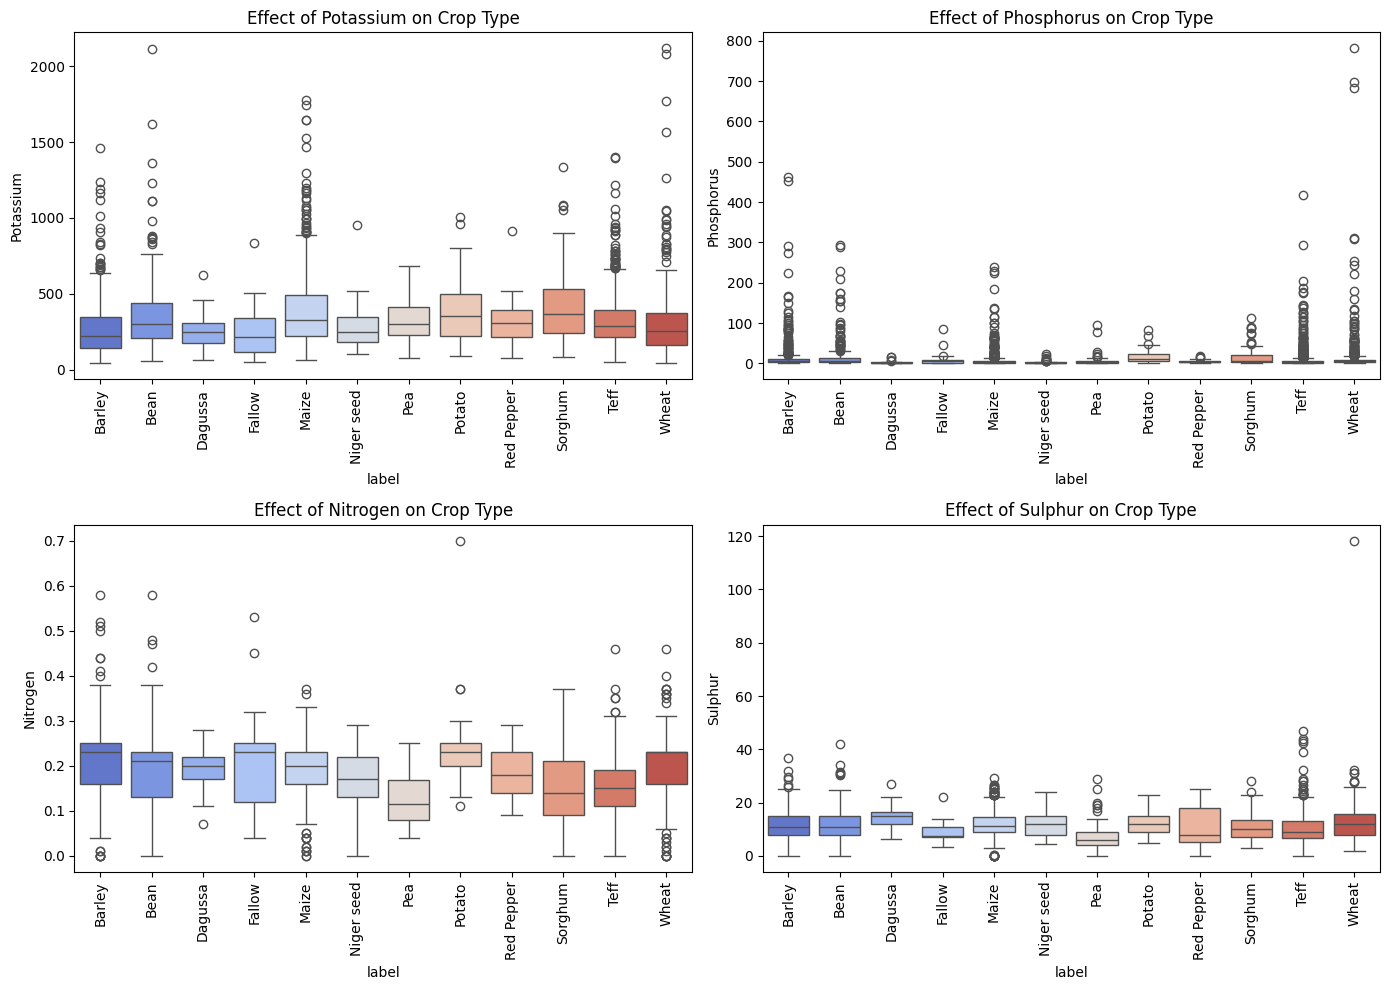

In [7]:
soil_features = ["Potassium", "Phosphorus", "Nitrogen", "Sulphur"]

plt.figure(figsize=(14, 10))
for i, col in enumerate(soil_features):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x=df["label"], y=df[col], palette="coolwarm")
    plt.xticks(rotation=90)
    plt.title(f"Effect of {col} on Crop Type")
plt.tight_layout()
plt.show()


<ipython-input-9-37ef69f43785>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["label"], y=df["MaxTemp_Summer"], palette="magma")


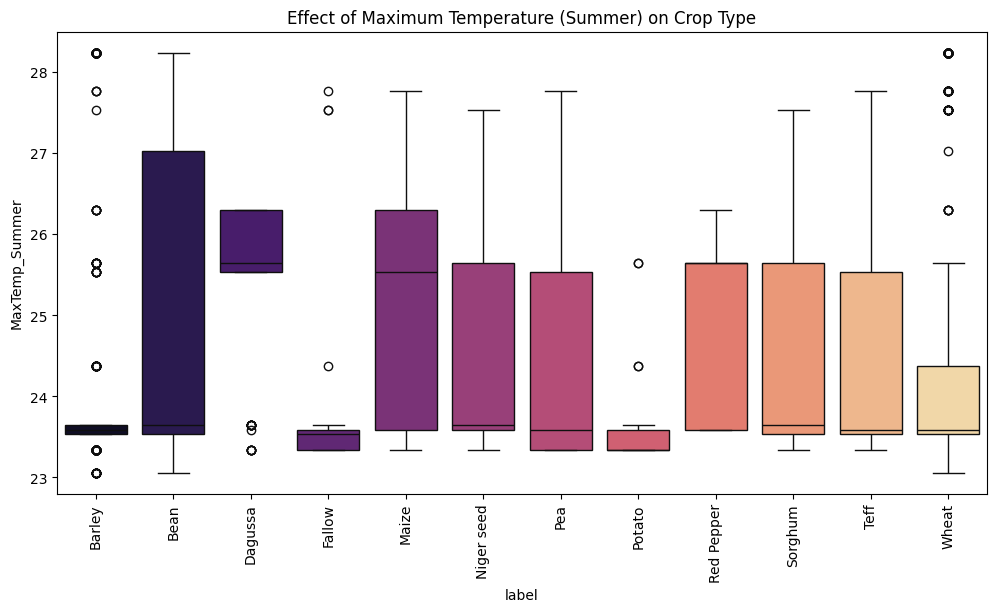

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df["label"], y=df["MaxTemp_Summer"], palette="magma")
plt.xticks(rotation=90)
plt.title("Effect of Maximum Temperature (Summer) on Crop Type")
plt.show()


<ipython-input-11-d3636d4c4b54>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="label", y="Soil_pH", data=df, palette="muted")


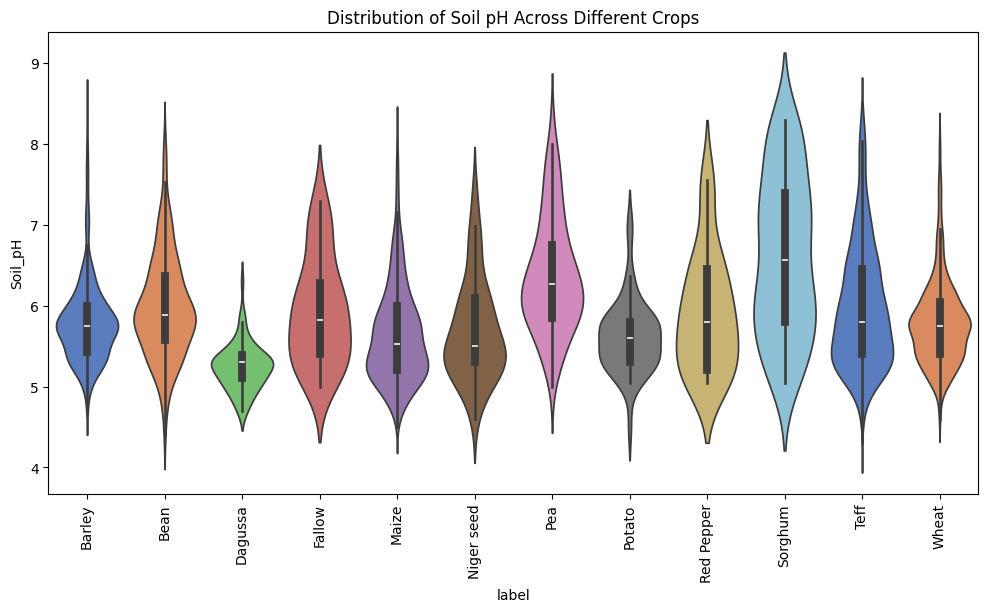

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(x="label", y="Soil_pH", data=df, palette="muted")
plt.xticks(rotation=90)
plt.title("Distribution of Soil pH Across Different Crops")
plt.show()


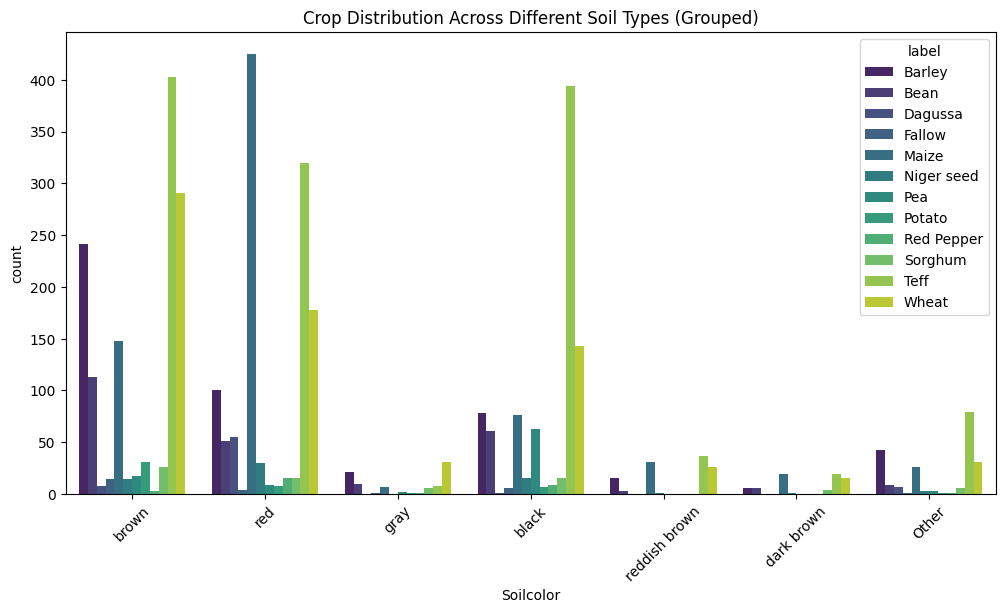

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define high-frequency soil colors to keep
high_freq_soil_colors = ["brown", "red", "gray", "black", "reddish brown", "dark brown"]

# Replace all other soil colors with "Other"
df["Soilcolor"] = df["Soilcolor"].apply(lambda x: x if x in high_freq_soil_colors else "Other")

# Plot the countplot
plt.figure(figsize=(12, 6))
sns.countplot(x="Soilcolor", hue="label", data=df, palette="viridis")
plt.xticks(rotation=45)
plt.title("Crop Distribution Across Different Soil Types (Grouped)")
plt.show()

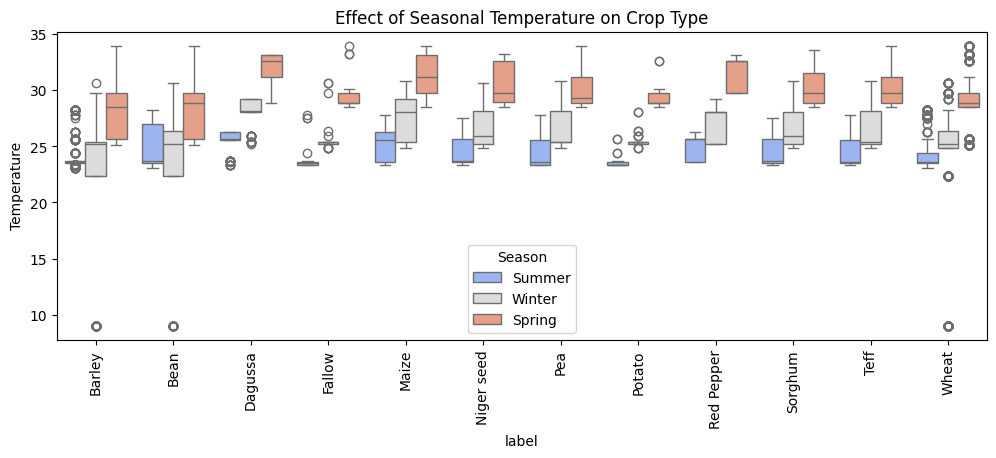

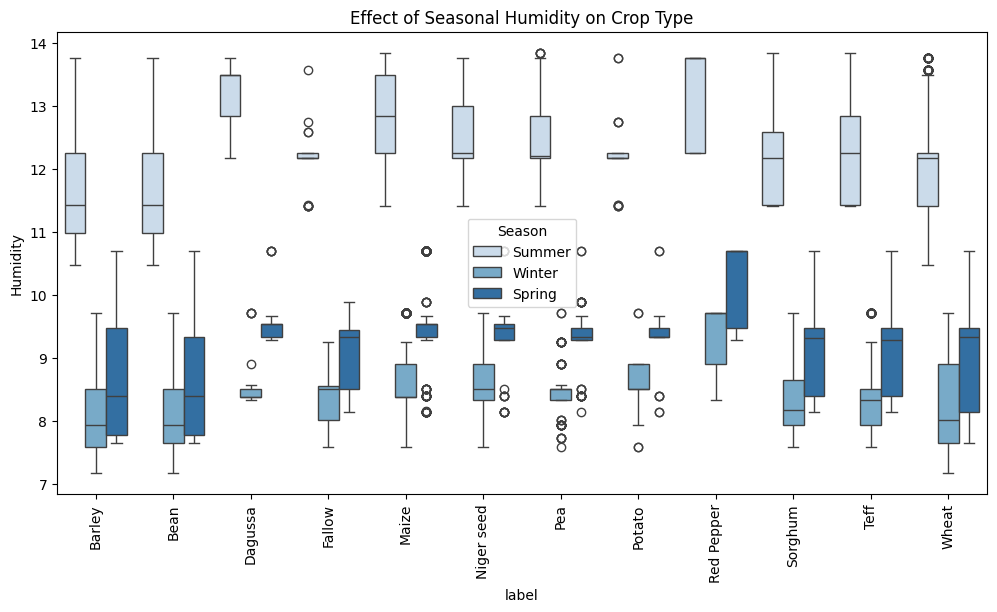

In [ ]:
# Combine seasonal temperature and humidity into single columns
df_melted_temp = df.melt(id_vars=["label"], value_vars=["MaxTemp_Summer", "MaxTemp_Winter", "MaxTemp_Spring"],
                          var_name="Season", value_name="Temperature")
df_melted_humidity = df.melt(id_vars=["label"], value_vars=["Humidity_Summer", "Humidity_Winter", "Humidity_Spring"],
                              var_name="Season", value_name="Humidity")

# Rename season names for better visualization
df_melted_temp["Season"] = df_melted_temp["Season"].str.replace("MaxTemp_", "")
df_melted_humidity["Season"] = df_melted_humidity["Season"].str.replace("Humidity_", "")

# Plot seasonal temperature variations
plt.figure(figsize=(12, 4))
sns.boxplot(x="label", y="Temperature", hue="Season", data=df_melted_temp, palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Effect of Seasonal Temperature on Crop Type")
plt.show()

# Plot seasonal humidity variations
plt.figure(figsize=(12, 6))
sns.boxplot(x="label", y="Humidity", hue="Season", data=df_melted_humidity, palette="Blues")
plt.xticks(rotation=90)
plt.title("Effect of Seasonal Humidity on Crop Type")
plt.show()

<ipython-input-208-2eb2bd345870>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df["label"], palette="viridis")


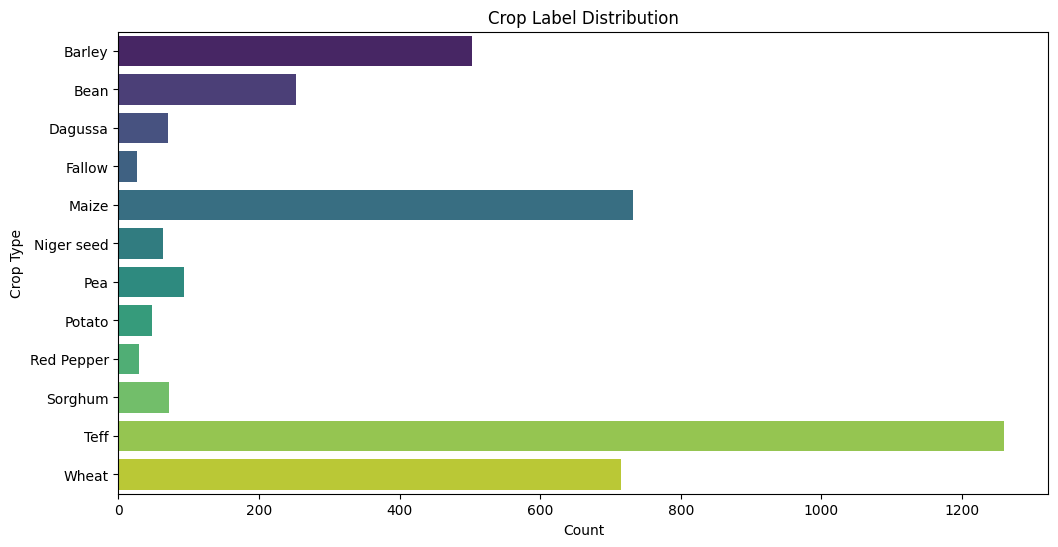

In [ ]:
# Visualization - Crop Label Distribution
plt.figure(figsize=(12, 6))
sns.countplot(y=df["label"], palette="viridis")
plt.title("Crop Label Distribution")
plt.xlabel("Count")
plt.ylabel("Crop Type")
plt.show()

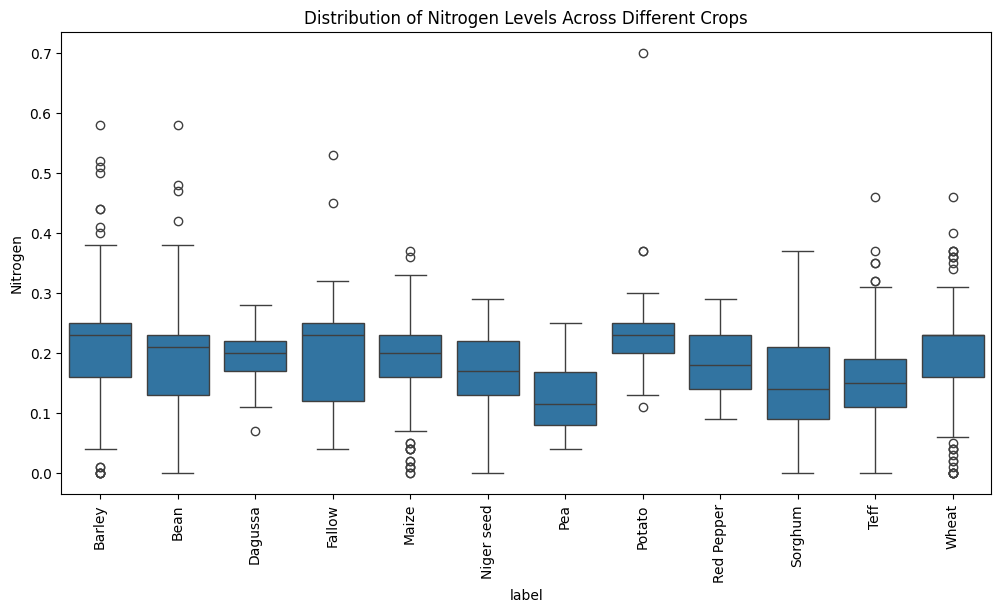

In [ ]:
# 1. Distribution of Nitrogen levels across different crops
plt.figure(figsize=(12, 6))
sns.boxplot(x='label', y='Nitrogen', data=df)
plt.xticks(rotation=90)
plt.title('Distribution of Nitrogen Levels Across Different Crops')
plt.show()

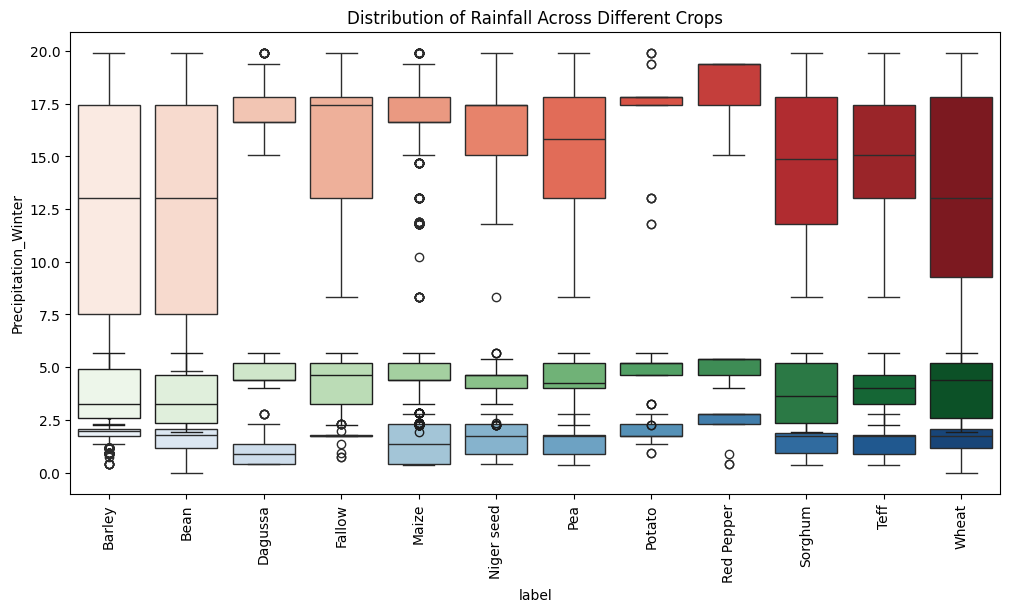

In [ ]:
# 7. Box plot of Rainfall for different crops
plt.figure(figsize=(12, 6))
sns.boxplot(x='label', y='Precipitation_Winter', data=df, hue='label', palette="Blues")
sns.boxplot(x='label', y='Precipitation_Summer', data=df, hue='label', palette="Reds")
sns.boxplot(x='label', y='Precipitation_Spring', data=df, hue='label', palette="Greens")
plt.xticks(rotation=90)
plt.title('Distribution of Rainfall Across Different Crops')
plt.show()

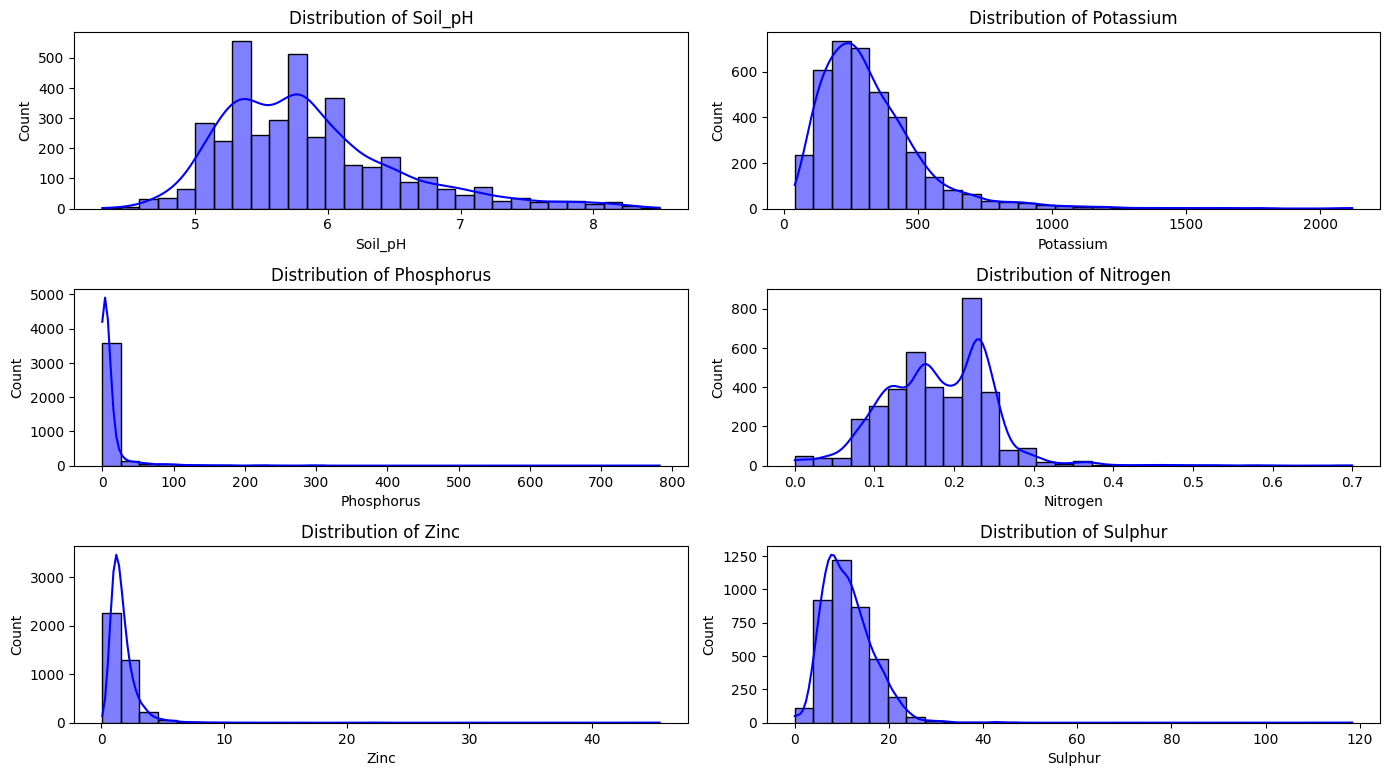

In [ ]:
# Plot distributions of key numerical features
numeric_cols = df.select_dtypes(include=["float64"]).columns

plt.figure(figsize=(14, 10))
for i, col in enumerate(numeric_cols[:6]):
    plt.subplot(4, 2, i+1)
    sns.histplot(df[col], bins=30, kde=True, color="blue")
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

In [ ]:
le_label = LabelEncoder()
df["label"] = le_label.fit_transform(df["label"])

In [ ]:
df.describe().transpose().round(2)

,count,mean,std,min,25%,50%,75%,max
Soilcolor,3867.0,30.48,6.42,0.00,27.00,27.00,38.00,44.00
Soil_pH,3867.0,5.86,0.68,4.30,5.39,5.78,6.20,8.50
Potassium,3867.0,324.28,202.25,41.13,191.00,282.00,405.00,2119.00
Phosphorus,3867.0,11.35,34.14,0.00,2.00,4.00,7.92,782.00
Nitrogen,3867.0,0.18,0.07,0.00,0.13,0.18,0.23,0.70
Zinc,3867.0,1.77,1.46,0.10,1.10,1.50,2.06,45.50
Sulphur,3867.0,11.31,5.54,0.05,7.30,10.70,14.20,118.35
Humidity_Winter,3867.0,8.35,0.61,7.18,7.93,8.38,8.91,9.72
Humidity_Spring,3867.0,9.08,0.79,7.65,8.40,9.34,9.48,10.70
Humidity_Summer,3867.0,12.23,0.89,10.48,11.43,12.17,12.84,13.85


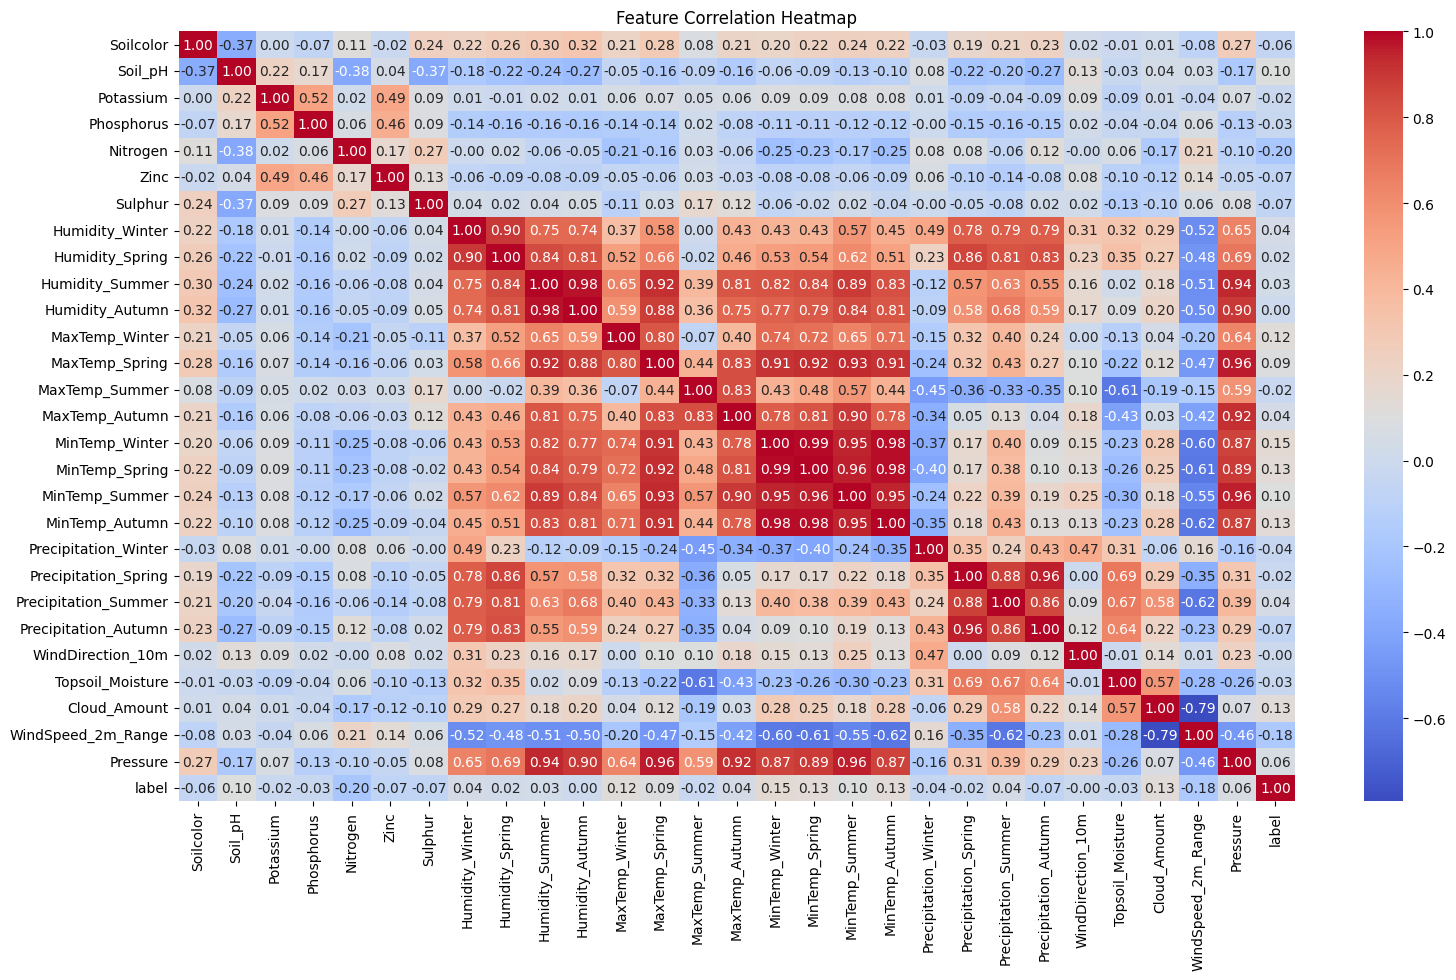

In [ ]:
# Select only the numeric columns
numeric_df = df.select_dtypes(include=[float, int])
# Heatmap of the correlation matrix
plt.figure(figsize=(18, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

# Pandas Profiling

In [8]:
!pip install ydata-profiling
import pandas as pd
from ydata_profiling import ProfileReport

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 25.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 82.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=0ca77e2c434dac0a99bb994da658fd756c4186c156218323f243d3452e72a5cc
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [11]:
profile = ProfileReport(df, title='Data Profiling Report',explorative=True,minimal=True)

In [12]:
  profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 29/29 [00:00<00:00, 65.63it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [13]:
from google.colab import files
profile.to_file('crop_report.html')  # Save the report

# Display the HTML in Colab:
from IPython.display import HTML
HTML('crop_report.html')

# Or download the report:
files.download('crop_report.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>